In [1]:
import pyfado
import os
import matplotlib.pyplot as plt

In [2]:
# Optional imports if you want to

#from astropy.table import Table # if you want to operate with tables
#import specutils # if you want to further manipulate the spectra
#import astropy.units as u # if you want to operate with untis

**Warning: pyFADO API is not fully decided.  Things may (and will) change.** 

# Loading the results 

FADO result files have the \_1D.fits, \_EL.fits, \_ST.fits and \_DE.fits sufixes. You just need to specify the prefix (object name?) to load them. 

The start of that pyFADO session should start by loading the files and store them in the memory. This is done by the ``FadoLoad`` class. See below



In [3]:
spec_name = "spec_wcs1d_p17q10_new_der.fits.output3"
path = "/home/mverdugo/work/MyCodes/pyFADO/data"
path = os.path.join(path,spec_name)
fado  = pyfado.FadoLoad(path)


Printing some basic information

In [4]:
print("Object redshift", fado.redshift)

Object redshift 0.351


## Dealing with one dimensional files

The ``OneD`` class deals with the information stored in the `_1D` files. Simple provide the ``FadoLoad`` object. 

In [5]:
oned = pyfado.OneD(fado)

with the ``OneD`` class is possible to obtain the different spectra stored in that file. They are returned as ``specutils.Spectrum1D`` objects, so you have access to all capabilities of that package

Posibilities for ``row_name`` are

    1: 'Observed'         spectrum de-redshifted and rebinned'
    2: 'Error'
    3: 'Mask'
    4: 'Best fit'
    5: 'Average'            of individual solutions
    6: 'Median'
    7: 'Stdev'
    8: 'Stellar'            using best fit'
    9: 'Nebular'            using best fit'
    10: 'AGN'               using best fit'
    11: 'M/L'
    12: 'LSF'  Line spread function

or as ``row=int``

(4000, 7000)

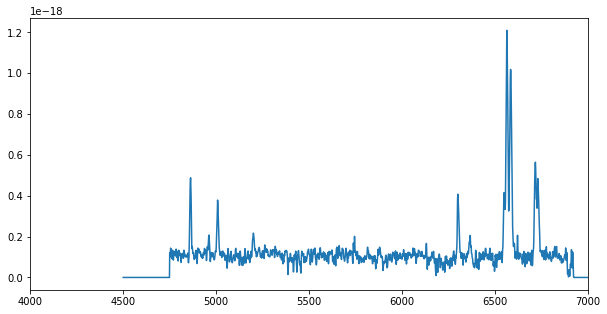

In [6]:
sp1 = oned.spectrum(row_name="observed")

fig = plt.figure(figsize=(10,5))
plt.plot(sp1.wavelength, sp1.flux)
plt.xlim(4000,7000)

(4000, 7000)

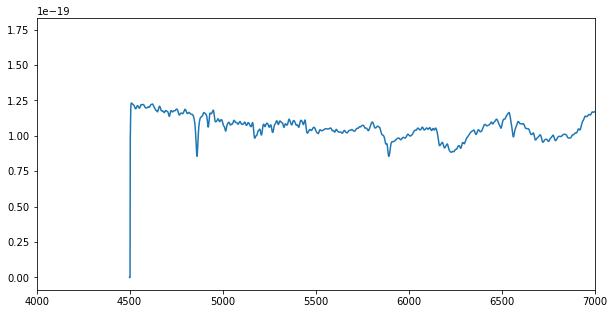

In [7]:
sp2 = oned.spectrum(row_name="best fit")

fig = plt.figure(figsize=(10,5))
plt.plot(sp2.wavelength, sp2.flux)
plt.xlim(4000,7000)

It is of course possible to operate with the spectra 

For example, get rid of the continuum

(4000, 7000)

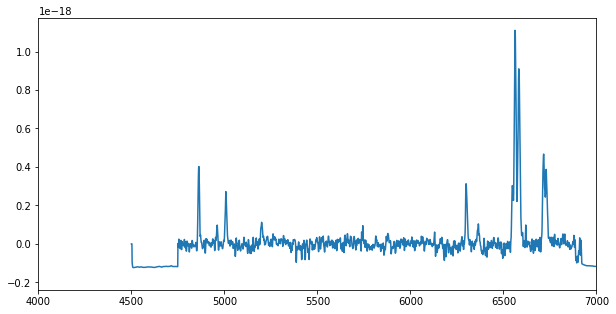

In [8]:
sp_no_cont = sp1 - sp2

fig = plt.figure(figsize=(10,5))
plt.plot(sp_no_cont.wavelength, sp_no_cont.flux)
plt.xlim(4000,7000)

(4000, 7000)

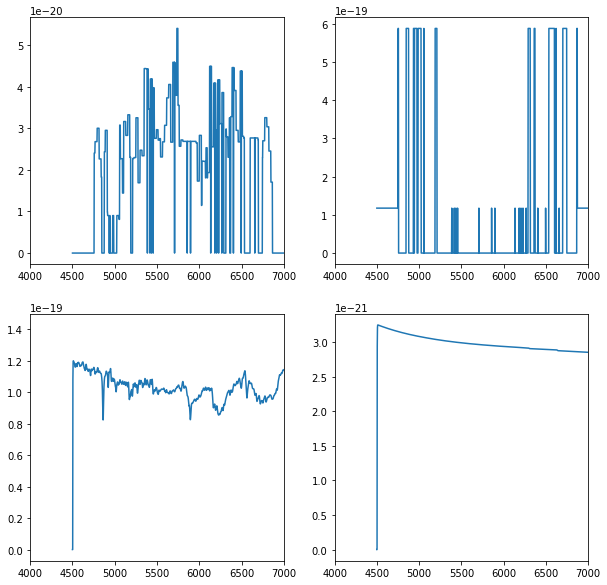

In [9]:
fig = plt.figure(figsize=(10,10))

plt.subplot(221)
sp = oned.spectrum(row_name="error")
plt.plot(sp.wavelength, sp.flux)
plt.xlim(4000,7000)

plt.subplot(222)
sp = oned.spectrum(row_name="mask")
plt.plot(sp.wavelength, sp.flux)
plt.xlim(4000,7000)


plt.subplot(223)
sp = oned.spectrum(row_name="stellar")
plt.plot(sp.wavelength, sp.flux)
plt.xlim(4000,7000)

plt.subplot(224)
sp = oned.spectrum(row_name="nebular")
plt.plot(sp.wavelength, sp.flux)
plt.xlim(4000,7000)

## Dealing with Emission Lines

To work with the emission lines you will need to provide the ``FadoLoad`` object to the ``EmLines`` class


In [10]:
# plot a line with the continuum subtracted
emlines = pyfado.EmLines(fado)

The list of fitted emission lines can be then simply obtained as

In [11]:
emlines.names

['[NeV]_3425',
 '[OII]_3727',
 '[OII]_3729',
 'H12_3750',
 'H11_3770',
 'H10_3797',
 'H9_3835',
 '[NeIII]_3869',
 'H8HeI_3889',
 '[NeIII]_3967',
 'Hepsilon_3970',
 'HeI_4026',
 '[SII]_4068',
 '[SII]_4076',
 'Hdelta_4101',
 'Hgamma_4340',
 '[OIII]_4363',
 'HeI_4471',
 '[FeIII]_4658',
 'HeII_4685',
 '[ArIV]_4711',
 'HeI_4713',
 '[ArIV]_4740',
 'Hbeta_4861',
 'HeI_4921',
 '[OIII]_4958',
 '[FeVII]_4988',
 '[OIII]_5006',
 'HeI_5015',
 '[FeVII]_5158',
 '[NI]_5199',
 '[FeIII]_5270',
 '[ClIII]_5519',
 '[NII]_5754',
 'HeI_5875',
 '[FeVII]_6086',
 '[OI]_6300',
 '[SIII]_6312',
 '[OI]_6363',
 '[NII]_6548',
 'Halpha_6562',
 '[NII]_6583',
 'HeI_6678',
 '[SII]_6716',
 '[SII]_6730',
 'HeI_7065',
 '[ArIII]_7135',
 '[OII]_7319',
 '[OII]_7330',
 '[ArIII]_7751',
 '[FeII]_8617']

An the results provided as ``astropy.units.Quantity`` for easy operations

In [12]:
emlines.results('Halpha_6562')

{'lambda': <Quantity 6562.515 Angstrom>,
 'amplitude': <Quantity 1.10616097e-18 erg / (Angstrom cm2 s)>,
 'sigma': <Quantity 4.6416216 Angstrom>,
 'vel': <Quantity 41.993923 km / s>,
 'shift': <Quantity -0.00197119 Angstrom>,
 'flux': <Quantity 1.28699837e-17 erg / (Angstrom cm2 s)>,
 'ew': <Quantity 129.30693 Angstrom>}

And plotting them as a ``specutils.Spectrum1D`` spectra

(6300, 6800)

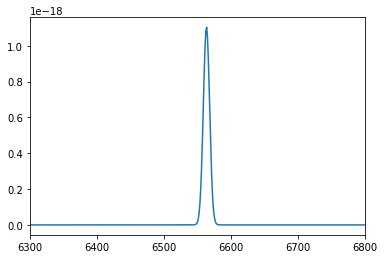

In [13]:
sp_el = emlines.line_spectra("Halpha_6562")

plt.plot(sp_el.wavelength, sp_el.flux)
plt.xlim(6300,6800)

And again one can operate with the spectra and for e.g. subtract all emission lines and plot the residual. 

Let's also compare it with the model spectra (thick red line)

(4500, 7000)

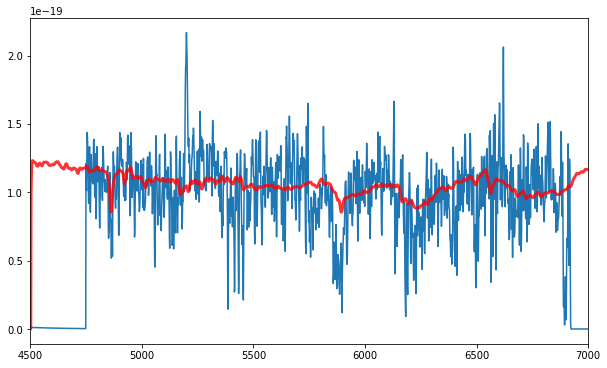

In [14]:
# Let subtract all em line spectra

sp = oned.spectrum(row_name="observed")
sp_best = oned.spectrum(row_name="best fit")

for name in emlines.names:
    sp = sp - emlines.line_spectra(name)

plt.figure(figsize=(10,6))
plt.plot(sp.wavelength, sp.flux)
plt.plot(sp_best.wavelength, sp_best.flux, lw=3, alpha=0.8, color="r")
plt.xlim(4500,7000)


But the best way to access the results is to produce an ``astropy.table.Table`` object which is simply done by

In [15]:
table = emlines.to_table()

# and save the results
table.write(path + "_table.tfits", format="fits", overwrite=True)
# and show the in notebook
table.show_in_notebook()

idx,line_name,lambda,amplitude,sigma,vel,shift,flux,ew,lambda_err,amplitude_err,sigma_err,vel_err,shift_err,flux_err,ew_err
0,[NeV]_3425,-999.0,-1.173825e-16,-999.0,-999.0,-999.0,-1.173825e-16,-999.0,-999.0,-1.173825e-16,-999.0,-999.0,-999.0,-1.173825e-16,-999.0
1,[OII]_3727,-999.0,-1.173825e-16,-999.0,-999.0,-999.0,-1.173825e-16,-999.0,-999.0,-1.173825e-16,-999.0,-999.0,-999.0,-1.173825e-16,-999.0
2,[OII]_3729,-999.0,-1.173825e-16,-999.0,-999.0,-999.0,-1.173825e-16,-999.0,-999.0,-1.173825e-16,-999.0,-999.0,-999.0,-1.173825e-16,-999.0
3,H12_3750,-999.0,-1.173825e-16,-999.0,-999.0,-999.0,-1.173825e-16,-999.0,-999.0,-1.173825e-16,-999.0,-999.0,-999.0,-1.173825e-16,-999.0
4,H11_3770,-999.0,-1.173825e-16,-999.0,-999.0,-999.0,-1.173825e-16,-999.0,-999.0,-1.173825e-16,-999.0,-999.0,-999.0,-1.173825e-16,-999.0
5,H10_3797,-999.0,-1.173825e-16,-999.0,-999.0,-999.0,-1.173825e-16,-999.0,-999.0,-1.173825e-16,-999.0,-999.0,-999.0,-1.173825e-16,-999.0
6,H9_3835,-999.0,-1.173825e-16,-999.0,-999.0,-999.0,-1.173825e-16,-999.0,-999.0,-1.173825e-16,-999.0,-999.0,-999.0,-1.173825e-16,-999.0
7,[NeIII]_386,-999.0,-1.173825e-16,-999.0,-999.0,-999.0,-1.173825e-16,-999.0,-999.0,-1.173825e-16,-999.0,-999.0,-999.0,-1.173825e-16,-999.0
8,H8HeI_3889,-999.0,-1.173825e-16,-999.0,-999.0,-999.0,-1.173825e-16,-999.0,-999.0,-1.173825e-16,-999.0,-999.0,-999.0,-1.173825e-16,-999.0
9,[NeIII]_396,-999.0,-1.173825e-16,-999.0,-999.0,-999.0,-1.173825e-16,-999.0,-999.0,-1.173825e-16,-999.0,-999.0,-999.0,-1.173825e-16,-999.0
